<a href="https://colab.research.google.com/github/ZaqueMendes/Linguagem_Python/blob/main/Cleber_Li%C3%A7%C3%A3o_5_v3TM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ta
!pip install yfinance --upgrade --no-cache-dir
!pip install  mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Carregando as bibliotecas necessarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mplfinance as fplt
from pandas_datareader import data as pdr
from datetime import date
import ta
import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Parametros da funçao

tickers = ["^BVSP", "PETR4.SA", "ITUB4.SA", "VALE3.SA"
           , "BBDC4.SA", "BBAS3.SA", "OIBR3.SA", "ALUP11.SA"
           , "IRBR3.SA", "TRPL4.SA", "BMGB4.SA", "ENAT3.SA"
           , "AURE3.SA", "PSSA3.SA", "LUPA3.SA"]

inicio = "2021-01-01"
fim = "2022-10-27"

In [ ]:
ibov = pdr.get_data_yahoo(tickers, start = inicio, end = fim)


[*********************100%***********************]  15 of 15 completed


In [ ]:
ibov

Adj Close                                                      \
            ALUP11.SA AURE3.SA   BBAS3.SA   BBDC4.SA  BMGB4.SA   ENAT3.SA   
Date                                                                        
2021-01-04  24.623293      NaN  33.087528  20.453518  5.016378  10.983036   
2021-01-05  24.493893      NaN  32.744236  20.328815  4.882608  11.320834   
2021-01-06  24.299789      NaN  33.492424  21.002573  4.849166  10.955647   
2021-01-07  23.893099      NaN  34.821552  21.560162  4.807363  10.983036   
2021-01-08  24.466162      NaN  35.024014  21.374302  4.957854  11.037814   
...               ...      ...        ...        ...       ...        ...   
2022-10-20  27.730000    13.83  43.599998  20.299999  2.779875  15.310000   
2022-10-21  28.000000    14.26  44.680000  20.730000  2.779875  15.530000   
2022-10-24  28.040001    14.36  40.200001  19.850000  2.710000  15.440000   
2022-10-25  27.860001    14.54  39.509998  19.730000  2.620000  15.210000   
2022-10-26  27.129999    14.48  38.110001  18.870001  2.480000  14.950000   

                                                  ...   Volume            \
           IRBR3.SA   ITUB4.SA LUPA3.SA OIBR3.SA  ... ENAT3.SA  IRBR3.SA   
Date                                              ...                      
2021-01-04     7.89  29.269659     2.39     2.35  ...  2343000  57265300   
2021-01-05     7.76  29.080206     2.59     2.48  ...  2678100  56600800   
2021-01-06     7.77  29.932714     2.42     2.44  ...  2006300  68815000   
2021-01-07     7.75  31.097826     2.51     2.46  ...  1495300  44530600   
2021-01-08     8.00  31.088343     2.48     2.43  ...  2589600  49464600   
...             ...        ...      ...      ...  ...      ...       ...   
2022-10-20     1.04  30.059999     3.59     0.26  ...  1121000  25243300   
2022-10-21     1.06  31.059999     3.59     0.26  ...  1447400  38545700   
2022-10-24     0.97  29.650000     3.49     0.25  ...  1359000  98695300   
2022-10-25     0.90  29.410000     3.64     0.25  ...   907800  66777300   
2022-10-26     0.86  28.780001     3.39     0.22  ...  2232100  57503000   

                                                                       \
            ITUB4.SA LUPA3.SA   OIBR3.SA   PETR4.SA PSSA3.SA TRPL4.SA   
Date                                                                    
2021-01-04  31347800   460300  245354000   74719700  1839800  2443000   
2021-01-05  28249800   682500  205132300   95181100  1741800  1108700   
2021-01-06  43061900   638700  247237400   96562500  2635400  1024400   
2021-01-07  46129800   512700  110246800   56171300  3196600  1237300   
2021-01-08  52532500   275700  171306400   67136300  4758400  1418800   
...              ...      ...        ...        ...      ...      ...   
2022-10-20  68491200   799000  270010400  114347400  3069100  2494400   
2022-10-21  49256900   585300  114863700  139601400  2227700  1664100   
2022-10-24  50976400   500200   87050400  142110900  1298500  1798300   
2022-10-25  26049300  1490400  105149500  113161200  2402500  1827000   
2022-10-26  48619400   928500  191544200  121334800  2483600  2502200   

                                
            VALE3.SA     ^BVSP  
Date                            
2021-01-04  37865500   8741400  
2021-01-05  34300300   9257100  
2021-01-06  53722500  11638200  
2021-01-07  74541400  11774800  
2021-01-08  58562700  11085800  
...              ...       ...  
2022-10-20  37240700  16915800  
2022-10-21  36846800         0  
2022-10-24  32035800  13278800  
2022-10-25  28158100  14727200  
2022-10-26  40845700  16088200  

[453 rows x 90 columns]

In [ ]:
ibov["Adj Close"][["^BVSP", "PETR4.SA", "ITUB4.SA", "VALE3.SA", "BBDC4.SA", "BBAS3.SA", "OIBR3.SA", "ALUP11.SA", "IRBR3.SA", "TRPL4.SA", "BMGB4.SA", "ENAT3.SA"
           , "AURE3.SA", "PSSA3.SA", "LUPA3.SA"]]

,^BVSP,PETR4.SA,ITUB4.SA,VALE3.SA,BBDC4.SA,BBAS3.SA,OIBR3.SA,ALUP11.SA,IRBR3.SA,TRPL4.SA,BMGB4.SA,ENAT3.SA,AURE3.SA,PSSA3.SA,LUPA3.SA
Date,,,,,,,,,,,,,,,
2021-01-04,118558.0,15.694892,29.269659,71.178864,20.453518,33.087528,2.35,24.623293,7.89,24.030399,5.016378,10.983036,NaN,20.823700,2.39
2021-01-05,119223.0,16.308359,29.080206,72.377365,20.328815,32.744236,2.48,24.493893,7.76,23.874466,4.882608,11.320834,NaN,20.640654,2.59
2021-01-06,119851.0,16.340933,29.932714,74.751030,21.002573,33.492424,2.44,24.299789,7.77,23.727201,4.849166,10.955647,NaN,20.248411,2.42
2021-01-07,121956.0,16.829533,31.097826,79.630661,21.560162,34.821552,2.46,23.893099,7.75,23.311390,4.807363,10.983036,NaN,20.710388,2.51
2021-01-08,125077.0,16.894678,31.088343,79.381622,21.374302,35.024014,2.43,24.466162,8.00,24.238302,4.957854,11.037814,NaN,22.139893,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-20,117171.0,36.470001,30.059999,72.019997,20.299999,43.599998,0.26,27.730000,1.04,23.260000,2.779875,15.310000,13.83,21.990000,3.59
2022-10-21,119929.0,37.720001,31.059999,74.129997,20.730000,44.680000,0.26,28.000000,1.06,23.830000,2.779875,15.530000,14.26,22.330000,3.59
2022-10-24,116013.0,34.250000,29.650000,71.930000,19.850000,40.200001,0.25,28.040001,0.97,23.850000,2.710000,15.440000,14.36,21.900000,3.49


In [ ]:
df_mapa = ibov["Adj Close"][tickers]

In [ ]:
tickers

['^BVSP',
 'PETR4.SA',
 'ITUB4.SA',
 'VALE3.SA',
 'BBDC4.SA',
 'BBAS3.SA',
 'OIBR3.SA',
 'ALUP11.SA',
 'IRBR3.SA',
 'TRPL4.SA',
 'BMGB4.SA',
 'ENAT3.SA',
 'AURE3.SA',
 'PSSA3.SA',
 'LUPA3.SA']

In [ ]:
df_mapa.head()

,^BVSP,PETR4.SA,ITUB4.SA,VALE3.SA,BBDC4.SA,BBAS3.SA,OIBR3.SA,ALUP11.SA,IRBR3.SA,TRPL4.SA,BMGB4.SA,ENAT3.SA,AURE3.SA,PSSA3.SA,LUPA3.SA
Date,,,,,,,,,,,,,,,
2021-01-04,118558.0,15.694892,29.269659,71.178864,20.453518,33.087528,2.35,24.623293,7.89,24.030399,5.016378,10.983036,NaN,20.823700,2.39
2021-01-05,119223.0,16.308359,29.080206,72.377365,20.328815,32.744236,2.48,24.493893,7.76,23.874466,4.882608,11.320834,NaN,20.640654,2.59
2021-01-06,119851.0,16.340933,29.932714,74.751030,21.002573,33.492424,2.44,24.299789,7.77,23.727201,4.849166,10.955647,NaN,20.248411,2.42
2021-01-07,121956.0,16.829533,31.097826,79.630661,21.560162,34.821552,2.46,23.893099,7.75,23.311390,4.807363,10.983036,NaN,20.710388,2.51
2021-01-08,125077.0,16.894678,31.088343,79.381622,21.374302,35.024014,2.43,24.466162,8.00,24.238302,4.957854,11.037814,NaN,22.139893,2.48


In [ ]:
df_mapa.rename(columns = {"^BVSP": "BVSP_Close", "PETR4.SA": "PETR_Close", "ITUB4.SA": "ITUB_Close"
                            , "VALE3.SA": "VALE_Close", "BBDC4.SA": "BBDC_Close", "BBAS3.SA": "BBAS_Close"
                            , "OIBR3.SA": "OIBR_Close", "ALUP11.SA": "ALUP_Close", "IRBR3.SA": "IRBR_Close"
                            , "TRPL4.SA": "TRPL_Close", "BMGB4.SA": "BMGB_Close", "ENAT3.SA": "ENAT_Close"
                            , "AURE3.SA": "AURE_Close", "PSSA3.SA": "PSSA_Close", "LUPA3.SA": "LUPA_Close"}, inplace = True)
df_mapa.head()

,BVSP_Close,PETR_Close,ITUB_Close,VALE_Close,BBDC_Close,BBAS_Close,OIBR_Close,ALUP_Close,IRBR_Close,TRPL_Close,BMGB_Close,ENAT_Close,AURE_Close,PSSA_Close,LUPA_Close
Date,,,,,,,,,,,,,,,
2021-01-04,118558.0,15.694892,29.269659,71.178864,20.453518,33.087528,2.35,24.623293,7.89,24.030399,5.016378,10.983036,NaN,20.823700,2.39
2021-01-05,119223.0,16.308359,29.080206,72.377365,20.328815,32.744236,2.48,24.493893,7.76,23.874466,4.882608,11.320834,NaN,20.640654,2.59
2021-01-06,119851.0,16.340933,29.932714,74.751030,21.002573,33.492424,2.44,24.299789,7.77,23.727201,4.849166,10.955647,NaN,20.248411,2.42
2021-01-07,121956.0,16.829533,31.097826,79.630661,21.560162,34.821552,2.46,23.893099,7.75,23.311390,4.807363,10.983036,NaN,20.710388,2.51
2021-01-08,125077.0,16.894678,31.088343,79.381622,21.374302,35.024014,2.43,24.466162,8.00,24.238302,4.957854,11.037814,NaN,22.139893,2.48


In [ ]:
# Calculando o RSL de 10 periodos

p = 10

df_mapa["MM_bvsp"] = df_mapa["BVSP_Close"].rolling(p).mean()
df_mapa["MM_petro"] = df_mapa["PETR_Close"].rolling(p).mean()
df_mapa["MM_itub"] = df_mapa["ITUB_Close"].rolling(p).mean()
df_mapa["MM_vale"] = df_mapa["VALE_Close"].rolling(p).mean()
df_mapa["MM_bbdc"] = df_mapa["BBDC_Close"].rolling(p).mean()
df_mapa["MM_bbas"] = df_mapa["BBAS_Close"].rolling(p).mean()
df_mapa["MM_oibr"] = df_mapa["OIBR_Close"].rolling(p).mean()
df_mapa["MM_alup"] = df_mapa["ALUP_Close"].rolling(p).mean()
df_mapa["MM_irbr"] = df_mapa["IRBR_Close"].rolling(p).mean()
df_mapa["MM_trpl"] = df_mapa["TRPL_Close"].rolling(p).mean()
df_mapa["MM_bmgb"] = df_mapa["BMGB_Close"].rolling(p).mean()
df_mapa["MM_enat"] = df_mapa["ENAT_Close"].rolling(p).mean()
df_mapa["MM_aure"] = df_mapa["AURE_Close"].rolling(p).mean()
df_mapa["MM_pssa"] = df_mapa["PSSA_Close"].rolling(p).mean()
df_mapa["MM_lupa"] = df_mapa["LUPA_Close"].rolling(p).mean()


In [ ]:
df_mapa["RSL_BVSP"] = (df_mapa["BVSP_Close"]/df_mapa["MM_bvsp"] - 1)*100
df_mapa["RSL_PETR"] = (df_mapa["PETR_Close"]/df_mapa["MM_petro"] - 1)*100
df_mapa["RSL_ITUB"] = (df_mapa["ITUB_Close"]/df_mapa["MM_itub"] - 1)*100
df_mapa["RSL_VALE"] = (df_mapa["VALE_Close"]/df_mapa["MM_vale"] - 1)*100
df_mapa["RSL_BBDC"] = (df_mapa["BBDC_Close"]/df_mapa["MM_bbdc"] - 1)*100
df_mapa["RSL_BBAS"] = (df_mapa["BBAS_Close"]/df_mapa["MM_bbas"] - 1)*100
df_mapa["RSL_OIBR"] = (df_mapa["OIBR_Close"]/df_mapa["MM_oibr"] - 1)*100
df_mapa["RSL_ALUP"] = (df_mapa["ALUP_Close"]/df_mapa["MM_alup"] - 1)*100
df_mapa["RSL_IRBR"] = (df_mapa["IRBR_Close"]/df_mapa["MM_irbr"] - 1)*100
df_mapa["RSL_TRPL"] = (df_mapa["TRPL_Close"]/df_mapa["MM_trpl"] - 1)*100
df_mapa["RSL_BMGB"] = (df_mapa["BMGB_Close"]/df_mapa["MM_bmgb"] - 1)*100
df_mapa["RSL_ENAT"] = (df_mapa["ENAT_Close"]/df_mapa["MM_enat"] - 1)*100
df_mapa["RSL_AURE"] = (df_mapa["AURE_Close"]/df_mapa["MM_aure"] - 1)*100
df_mapa["RSL_PSSA"] = (df_mapa["PSSA_Close"]/df_mapa["MM_pssa"] - 1)*100
df_mapa["RSL_LUPA"] = (df_mapa["LUPA_Close"]/df_mapa["MM_lupa"] - 1)*100

In [ ]:
# Calculando o RSI (IFR) de 2 e 14 periodos


petr_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["BVSP_Close"], window = 2)
petr_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["BVSP_Close"], window = 14)
bvsp_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["PETR_Close"], window = 2)
bvsp_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["PETR_Close"], window = 14)
itub_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["ITUB_Close"], window = 2)
itub_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["ITUB_Close"], window = 14)
vale_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["VALE_Close"], window = 2)
vale_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["VALE_Close"], window = 14)
bbdc_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["BBDC_Close"], window = 2)
bbdc_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["BBDC_Close"], window = 14)
bbas_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["BBAS_Close"], window = 2)
bbas_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["BBAS_Close"], window = 14)

oibr_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["OIBR_Close"], window = 2)
oibr_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["OIBR_Close"], window = 14)

alup_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["ALUP_Close"], window = 2)
alup_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["ALUP_Close"], window = 14)

irbr_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["IRBR_Close"], window = 2)
irbr_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["IRBR_Close"], window = 14)

trpl_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["TRPL_Close"], window = 2)
trpl_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["TRPL_Close"], window = 14)

bmgb_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["BMGB_Close"], window = 2)
bmgb_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["BMGB_Close"], window = 14)

enat_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["ENAT_Close"], window = 2)
enat_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["ENAT_Close"], window = 14)

aure_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["AURE_Close"], window = 2)
aure_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["AURE_Close"], window = 14)

pssa_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["PSSA_Close"], window = 2)
pssa_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["PSSA_Close"], window = 14)

lupa_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["LUPA_Close"], window = 2)
lupa_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["LUPA_Close"], window = 14)


df_mapa["RSI2_PETR"] = petr_rsi2.rsi()
df_mapa["RSI14_PETR"] = petr_rsi14.rsi()

df_mapa["RSI2_BVSP"] = bvsp_rsi2.rsi()
df_mapa["RSI14_BVSP"] = bvsp_rsi14.rsi()

df_mapa["RSI2_ITUB"] = itub_rsi2.rsi()
df_mapa["RSI14_ITUB"] = itub_rsi14.rsi()

df_mapa["RSI2_VALE"] = vale_rsi2.rsi()
df_mapa["RSI14_VALE"] = vale_rsi14.rsi()

df_mapa["RSI2_BBDC"] = bbdc_rsi2.rsi()
df_mapa["RSI14_BBDC"] = bbdc_rsi14.rsi()

df_mapa["RSI2_BBAS"] = bbas_rsi2.rsi()
df_mapa["RSI14_BBAS"] = bbas_rsi14.rsi()

df_mapa["RSI2_OIBR"] = oibr_rsi2.rsi() 
df_mapa["RSI14_OIBR"] = oibr_rsi14.rsi() 

df_mapa["RSI2_ALUP"] = alup_rsi2.rsi() 
df_mapa["RSI14_ALUP"] = alup_rsi14.rsi() 

df_mapa["RSI2_IRBR"] = irbr_rsi2.rsi() 
df_mapa["RSI14_IRBR"] = irbr_rsi14.rsi() 

df_mapa["RSI2_TRPL"] = trpl_rsi2.rsi() 
df_mapa["RSI14_TRPL"] = trpl_rsi14.rsi()

df_mapa["RSI2_BMGB"] = bmgb_rsi2.rsi() 
df_mapa["RSI14_BMGB"] = bmgb_rsi14.rsi()

df_mapa["RSI2_ENAT"] = enat_rsi2.rsi() 
df_mapa["RSI14_ENAT"] = enat_rsi14.rsi() 

df_mapa["RSI2_AURE"] = aure_rsi2.rsi() 
df_mapa["RSI14_AURE"] = aure_rsi14.rsi() 

df_mapa["RSI2_PSSA"] = pssa_rsi2.rsi() 
df_mapa["RSI14_PSSA"] = pssa_rsi14.rsi() 

df_mapa["RSI2_LUPA"] = lupa_rsi2.rsi() 
df_mapa["RSI14_LUPA"] = lupa_rsi14.rsi() 


In [ ]:
df_mapa.head()

,BVSP_Close,PETR_Close,ITUB_Close,VALE_Close,BBDC_Close,BBAS_Close,OIBR_Close,ALUP_Close,IRBR_Close,TRPL_Close,...,RSI2_BMGB,RSI14_BMGB,RSI2_ENAT,RSI14_ENAT,RSI2_AURE,RSI14_AURE,RSI2_PSSA,RSI14_PSSA,RSI2_LUPA,RSI14_LUPA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,118558.0,15.694892,29.269659,71.178864,20.453518,33.087528,2.35,24.623293,7.89,24.030399,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,119223.0,16.308359,29.080206,72.377365,20.328815,32.744236,2.48,24.493893,7.76,23.874466,...,0.000000,NaN,100.000000,NaN,100.0,NaN,0.000000,NaN,100.000000,NaN
2021-01-06,119851.0,16.340933,29.932714,74.751030,21.002573,33.492424,2.44,24.299789,7.77,23.727201,...,0.000000,NaN,31.623903,NaN,100.0,NaN,0.000000,NaN,37.037037,NaN
2021-01-07,121956.0,16.829533,31.097826,79.630661,21.560162,34.821552,2.46,23.893099,7.75,23.311390,...,0.000000,NaN,37.984568,NaN,100.0,NaN,65.634804,NaN,62.222222,NaN
2021-01-08,125077.0,16.894678,31.088343,79.381622,21.374302,35.024014,2.43,24.466162,8.00,24.238302,...,76.595721,NaN,54.802287,NaN,100.0,NaN,93.211010,NaN,49.122807,NaN


In [ ]:
df_mapa["RSL_BVSP"].tail(1)[0]

-2.158408212987939

CRIANDO MAPA

In [ ]:
# Preparando o dataframe

# Agrupando os dados
indicadores = [
                  
                  ["BVSP", df_mapa["RSL_BVSP"].tail(1)[0], df_mapa["RSI14_BVSP"].tail(1)[0]]
                , ["PETR4", df_mapa["RSL_PETR"].tail(1)[0], df_mapa["RSI14_PETR"].tail(1)[0]]
                , ["ITUB4", df_mapa["RSL_ITUB"].tail(1)[0], df_mapa["RSI14_ITUB"].tail(1)[0]]
                , ["VALE3", df_mapa["RSL_VALE"].tail(1)[0], df_mapa["RSI14_VALE"].tail(1)[0]]
                , ["BBDC4", df_mapa["RSL_BBDC"].tail(1)[0], df_mapa["RSI14_BBDC"].tail(1)[0]]
                , ["BBAS3", df_mapa["RSL_BBAS"].tail(1)[0], df_mapa["RSI14_BBAS"].tail(1)[0]]
                , ["OIBR3", df_mapa["RSL_OIBR"].tail(1)[0], df_mapa["RSI14_OIBR"].tail(1)[0]]
                , ["ALUP11", df_mapa["RSL_ALUP"].tail(1)[0], df_mapa["RSI14_ALUP"].tail(1)[0]]
                , ["IRBR3", df_mapa["RSL_IRBR"].tail(1)[0], df_mapa["RSI14_IRBR"].tail(1)[0]]
                , ["TRPL4", df_mapa["RSL_TRPL"].tail(1)[0], df_mapa["RSI14_TRPL"].tail(1)[0]]
                , ["BMGB4", df_mapa["RSL_BMGB"].tail(1)[0], df_mapa["RSI14_BMGB"].tail(1)[0]]
                , ["ENAT3", df_mapa["RSL_ENAT"].tail(1)[0], df_mapa["RSI14_ENAT"].tail(1)[0]]
                , ["AURE3", df_mapa["RSL_AURE"].tail(1)[0], df_mapa["RSI14_AURE"].tail(1)[0]]
                , ["PSSA3", df_mapa["RSL_PSSA"].tail(1)[0], df_mapa["RSI14_PSSA"].tail(1)[0]]
                , ["LUPA3", df_mapa["RSL_LUPA"].tail(1)[0], df_mapa["RSI14_LUPA"].tail(1)[0]]
             ]
 
# Criar o DataFrame do pandas
mapa = pd.DataFrame(indicadores, columns = ["Ativo", "RSL", "RSI14"])

mapa.head(15)

,Ativo,RSL,RSI14
0,BVSP,-2.158408,48.333825
1,PETR4,-5.204893,46.908870
2,ITUB4,-2.215273,49.911495
3,VALE3,2.188867,55.789720
4,BBDC4,-5.113889,37.615314
5,BBAS3,-6.070539,42.471919
6,OIBR3,-25.423730,14.133677
7,ALUP11,-2.153140,42.106634
8,IRBR3,-15.270934,26.856574
9,TRPL4,1.043355,53.127069


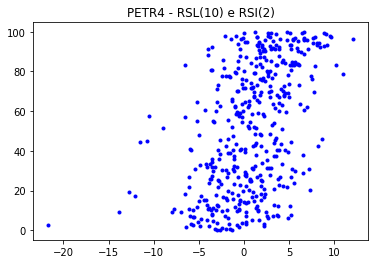

In [ ]:
# Algumas considerações interessantes

plt.plot(df_mapa["RSL_PETR"], df_mapa["RSI2_PETR"], ".", color = "blue")
plt.title("PETR4 - RSL(10) e RSI(2)");

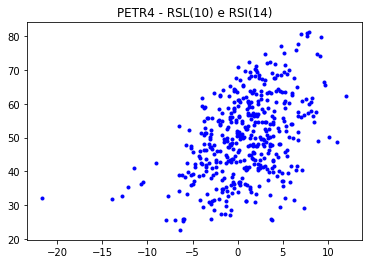

In [ ]:
plt.plot(df_mapa["RSL_PETR"], df_mapa["RSI14_PETR"], ".", color = "blue")
plt.title("PETR4 - RSL(10) e RSI(14)");

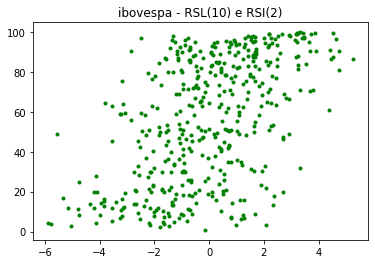

In [ ]:
plt.plot(df_mapa["RSL_BVSP"], df_mapa["RSI2_BVSP"], ".", color = "green")
plt.title("ibovespa - RSL(10) e RSI(2)");


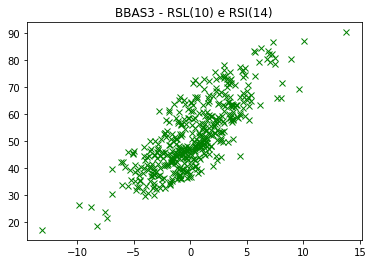

In [ ]:
plt.plot(df_mapa["RSL_BBAS"], df_mapa["RSI14_BBAS"], "x", color = "green")
plt.title("BBAS3 - RSL(10) e RSI(14)");

In [ ]:
mapa

,Ativo,RSL,RSI14
0,BVSP,-2.158408,48.333825
1,PETR4,-5.204893,46.908870
2,ITUB4,-2.215273,49.911495
3,VALE3,2.188867,55.789720
4,BBDC4,-5.113889,37.615314
5,BBAS3,-6.070539,42.471919
6,OIBR3,-25.423730,14.133677
7,ALUP11,-2.153140,42.106634
8,IRBR3,-15.270934,26.856574
9,TRPL4,1.043355,53.127069


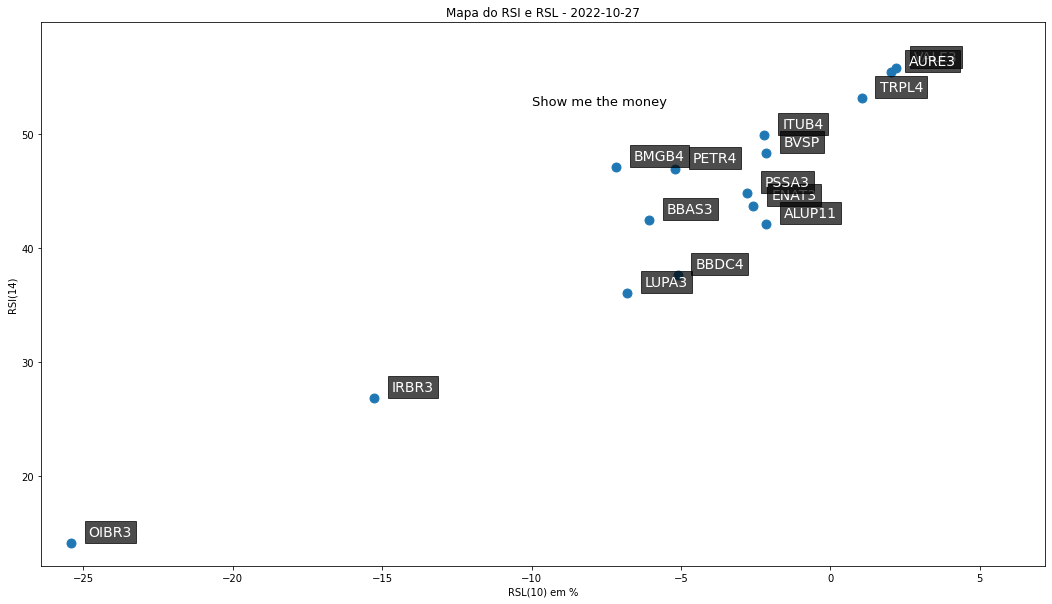

In [ ]:
plt.figure(figsize = (18, 10))

plt.scatter(mapa["RSL"], mapa["RSI14"], s = 80)
for i in range(mapa.shape[0]):
    plt.text(x = mapa.RSL[i] + 0.6, y = mapa.RSI14[i] + 0.6 , s = mapa.Ativo[i], 
             fontdict = dict(color = "white", size = 14),
             bbox = dict(facecolor = "black", alpha = 0.7))

plt.xlim(mapa.RSL.min() - 1, mapa.RSL.max() + 5)               
plt.ylim(mapa.RSI14.min() - 2, mapa.RSI14.max() + 4)          

setup = dict(size = 13, color = "black")
plt.text(-10, 52.5, "Show me the money", **setup)

plt.title("Mapa do RSI e RSL - 2022-10-27") 
plt.xlabel("RSL(10) em %")                        
plt.ylabel("RSI(14)")                     
plt.show()